Using Deep AutoVIML for Tabular Data Classification. The goals is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

Link to dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database
Reference for the notebook: https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Demo.ipynb

In [1]:
!pip install deep_autoviml==0.0.43 storm-tuner>=0.0.8 optuna tensorflow-text==2.5.0 scikit-learn>=0.23.1 xlrd


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Import Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
LLB = LabelEncoder()
from deep_autoviml import deep_autoviml as deepauto
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score


Imported deep_auto_viml. version=0.0.68
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


# Data Download & Preparation

In [2]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"surabhigovil","key":"a2383170fa9bf2b8de65b2bf4b3f8363"}'}

In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [33]:
! kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 14.6MB/s]


In [34]:
! unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


# Reading Data

## Spliting data into test and train

In [40]:
# split into input and output elements
train, test = train_test_split(train, test_size=0.2, random_state=99)

In [35]:
text_data_or_file = '/content/diabetes.csv'

In [36]:
# load dataset
train = pd.read_csv(text_data_or_file, header=0, sep=sep)
print(train.shape)
train.head(1)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1


In [37]:
project_name = "tabular"
target = 'Outcome'
sep = ','

# Model

In [38]:
keras_model_type =  "auto" 
model_options = {"tuner":"optuna", 'nlp_char_limit':10, 'cat_feat_cross_flag':False, 'max_trials': 5}
keras_options = {"patience":10,'class_weight':True, "early_stopping": True, "epochs": 100}

## Compiling Model

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    epochs : 100
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : False
    nlp_char_limit : 10
    max_trials : 5
    tuner : optuna
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
    Modified file names to fit no-space in column names rule in Tensorflow!
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeri

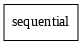

Model plot saved in file: deep_autoviml_tabular_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using optuna Tuner...
    Class weights: {0: 1.0, 1: 1.4328358208955223}
After preprocessing using keras layers, features dimensions is now 32
    original datasize = 768, initial batchsize = 32
    Early stopping : True
    recommended steps per epoch = 12
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 1200
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 12, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep

[I 2021-10-31 23:11:48,534] A new study created in memory with name: tabular_auto_study_2317


    Splitting validation 20 into 10+10 percent: valid and heldout data
Single-Label: Heldout data shape: (96,)
    Training auto model using optuna. This will take time...
Restoring model weights from the end of the best epoch.
Epoch 00017: early stopping


[I 2021-10-31 23:11:54,850] Trial 0 finished with value: 0.5838625311851502 and parameters: {'n_layers': 2, 'n_units': 96, 'weight_decay': 1.642990039904019e-07, 'use_bias': False, 'batch_norm': True, 'add_noise': False, 'dropout': 0.3024056940752576, 'activation': 'tanh', 'kernel_initializer': 'glorot_uniform', 'optimizer': 'Adam', 'adam_learning_rate': 0.07869004988730212, 'adam_epsilon': 4.577118256129773e-07}. Best is trial 0 with value: 0.5838625311851502.
[I 2021-10-31 23:11:58,726] Trial 1 finished with value: 0.5882630228996277 and parameters: {'n_layers': 3, 'n_units': 48, 'weight_decay': 3.386583472399946e-07, 'use_bias': False, 'batch_norm': True, 'add_noise': False, 'dropout': 0.32966892016619037, 'activation': 'selu', 'kernel_initializer': 'he_uniform', 'optimizer': 'Adam', 'adam_learning_rate': 0.020204724125085498, 'adam_epsilon': 1.2676246219365762e-12}. Best is trial 1 with value: 0.5882630228996277.


Restoring model weights from the end of the best epoch.
Epoch 00016: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping


[I 2021-10-31 23:12:02,946] Trial 2 finished with value: 0.5703408718109131 and parameters: {'n_layers': 4, 'n_units': 128, 'weight_decay': 0.0004450030796034784, 'use_bias': False, 'batch_norm': True, 'add_noise': True, 'dropout': 0.1596769401296949, 'activation': 'relu', 'kernel_initializer': 'he_normal', 'adam_learning_rate': 0.015369516552465448, 'optimizer': 'Adam', 'adam_epsilon': 2.6502380942844578e-06}. Best is trial 1 with value: 0.5882630228996277.
[I 2021-10-31 23:12:12,444] Trial 3 finished with value: 0.6148151755332947 and parameters: {'n_layers': 6, 'n_units': 96, 'weight_decay': 1.8514561324587855e-06, 'use_bias': True, 'batch_norm': True, 'add_noise': False, 'dropout': 0.15951301257739997, 'activation': 'elu', 'kernel_initializer': 'he_normal', 'optimizer': 'SGD', 'sgd_opt_learning_rate': 0.0001526000237345319, 'sgd_opt_momentum': 0.802561153167477}. Best is trial 3 with value: 0.6148151755332947.


Restoring model weights from the end of the best epoch.
Epoch 00029: early stopping


[I 2021-10-31 23:12:18,344] Trial 4 finished with value: 0.5838502526283265 and parameters: {'n_layers': 5, 'n_units': 128, 'weight_decay': 0.0007476168093112906, 'use_bias': False, 'batch_norm': True, 'add_noise': False, 'dropout': 0.04828005516899031, 'activation': 'elu', 'kernel_initializer': 'he_normal', 'optimizer': 'SGD', 'sgd_opt_learning_rate': 0.00029130015739106023, 'sgd_opt_momentum': 0.8312982344581109}. Best is trial 3 with value: 0.6148151755332947.


Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Best trial score in Optuna: 0.6148151755332947
    Scores mean: 0.5882263708114625 std: 0.014594865268627138
    Best params: {'n_layers': 6, 'n_units': 96, 'weight_decay': 1.8514561324587855e-06, 'use_bias': True, 'batch_norm': True, 'add_noise': False, 'dropout': 0.15951301257739997, 'activation': 'elu', 'kernel_initializer': 'he_normal', 'optimizer': 'SGD', 'sgd_opt_learning_rate': 0.0001526000237345319, 'sgd_opt_momentum': 0.802561153167477}

Best optimizer = <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7f0c2b5bb150> and best learning_rate = 0.00015260003
Model training with best hyperparameters for 100 epochs
    Callback added: EarlyStopping object at 0x7f0c25356710>
    Callback added: TensorBoard object at 0x7f0c25356410>
    Callback added: LearningRateScheduler object at 0x7f0c251bf1d0>
Epoch 1/100
12/12 [==============================] - 4s 155ms/step - loss: 1.0459 

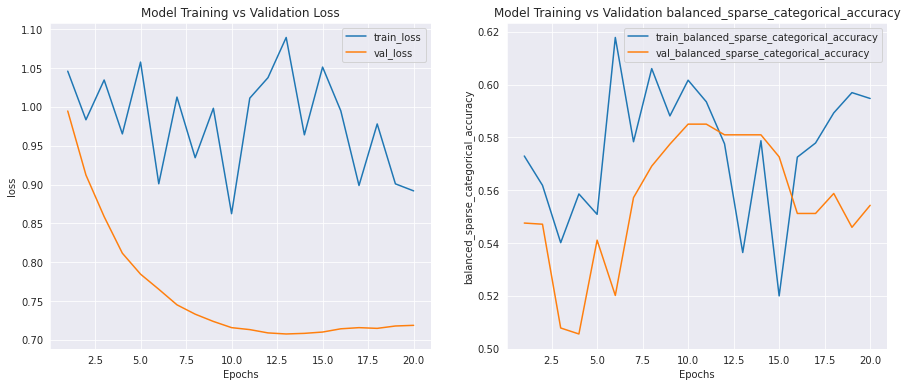

Time taken to train model (in mins) = 1
    Stopped epoch = 10
Held out data actuals shape: (96,)
    samples from labels: [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]

Held out predictions shape:(96,)
    Sample predictions: [0 0 0 0 1 0 0 1 0 1]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: Outcome
#################################################################


    Accuracy          = 57.3%
    Balanced Accuracy = 57.8%
    Precision         = 50.0%
    Average Precision = 57.6%
    Recall            = 61.0%
    F1 Score          = 54.9%
    ROC AUC           = 56.9%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 0.00011644446
    set learning rate using best model: 0.00011644446
    max epochs for training = 10

Model not being saved since save_model_flag set to False...
6596

Saving vocab dictionary using pickle in tabular/auto/model_2021_10_31-23_12_37/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in tabular/auto/model_2021_10_31-23_12_37/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in tabular/auto/model_2021_10_31-23_12_37/artifacts/var_df.pickle...will take time...
    Saved pickle file in tabular/auto/model_2021_10_31-23_12_37/artifacts/var_df.pickle

Deep_Auto_ViML completed. Tot

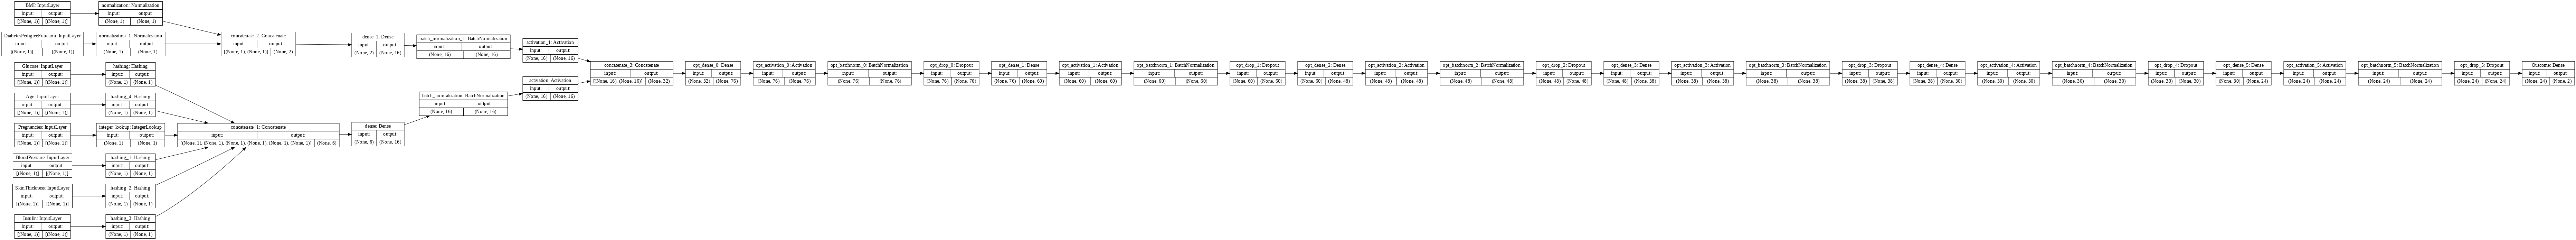

Model plot saved in file: deep_autoviml_tabular_auto_model_after.png


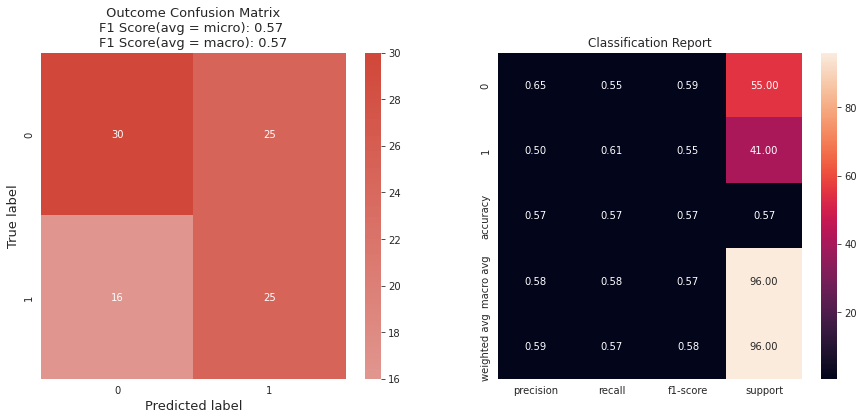

In [39]:
output = deepauto.fit(train, target, keras_model_type,project_name=project_name, keras_options=keras_options,
                 model_options=model_options, save_model_flag=False, use_my_model='', verbose=1)

# Predictions

In [41]:
model = output[0]
cat_vocab_dict = output[1]

In [42]:
test.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
129,0,105,84,0,0,27.90,0.74,62,1


In [43]:
y_preds = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, cat_vocab_dict=cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x7f0c2b078ad0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 154
    Modified column names to fit no-spaces-in-column-names rule in Tensorflow!
    test data loaded successfully.
test data size =  154 , batch_size =  32
    number of steps needed to predict: 5
Returning model predictions in form of a list...of length 2
Time taken in mins for predictions = 0


In [48]:
y_test = test[target].values
y_test.shape

(154,)

In [44]:
y_preds[0][:5]

array([[0.293, 0.424],
       [0.336, 0.662],
       [0.627, 0.529],
       [0.668, 0.715],
       [0.684, 0.647]], dtype=float32)

In [45]:
y_preds[0].shape

(154, 2)

In [46]:
from deep_autoviml.utilities.utilities import print_classification_model_stats, print_regression_model_stats

In [49]:
print_classification_model_stats(y_test, y_preds[1])

Balanced Accuracy = 56.53%
Confusion Matrix:
[[48 57]
 [16 33]]
              precision    recall  f1-score   support

           0       0.75      0.46      0.57       105
           1       0.37      0.67      0.47        49

    accuracy                           0.53       154
   macro avg       0.56      0.57      0.52       154
weighted avg       0.63      0.53      0.54       154

#####################################################################


0.5653061224489796